# **CORE 4: Predicción de Calidad del Vino (Core)**
Utilizar técnicas de clasificación aprendidas hasta el momento para predecir la calidad del vino basándose en características físico-químicas. Este ejercicio permitirá aplicar conceptos como la selección de características, preprocesamiento de datos, entrenamiento y evaluación de modelos de clasificación, y análisis de resultados mediante métricas y visualizaciones.

**DEA realizado en archivo DEA_CORE4.ipynb**

In [35]:
import pandas as pd

In [36]:
path ='/content/drive/MyDrive/Bootcamp-ML/Cores/CORE 4 Wines/wine_clean.csv'
df = pd.read_csv(path)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [38]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.0,2.0,5.0,7.0,8.0,9.0,16.0
volatile acidity,1143.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
citric acid,1143.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
residual sugar,1143.0,2.0,0.0,1.0,2.0,2.0,2.0,4.0
chlorides,1143.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
free sulfur dioxide,1143.0,15.0,9.0,1.0,7.0,13.0,20.0,42.0
total sulfur dioxide,1143.0,42.0,26.0,6.0,21.0,37.0,57.0,121.0
density,1143.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
pH,1143.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0
sulphates,1143.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

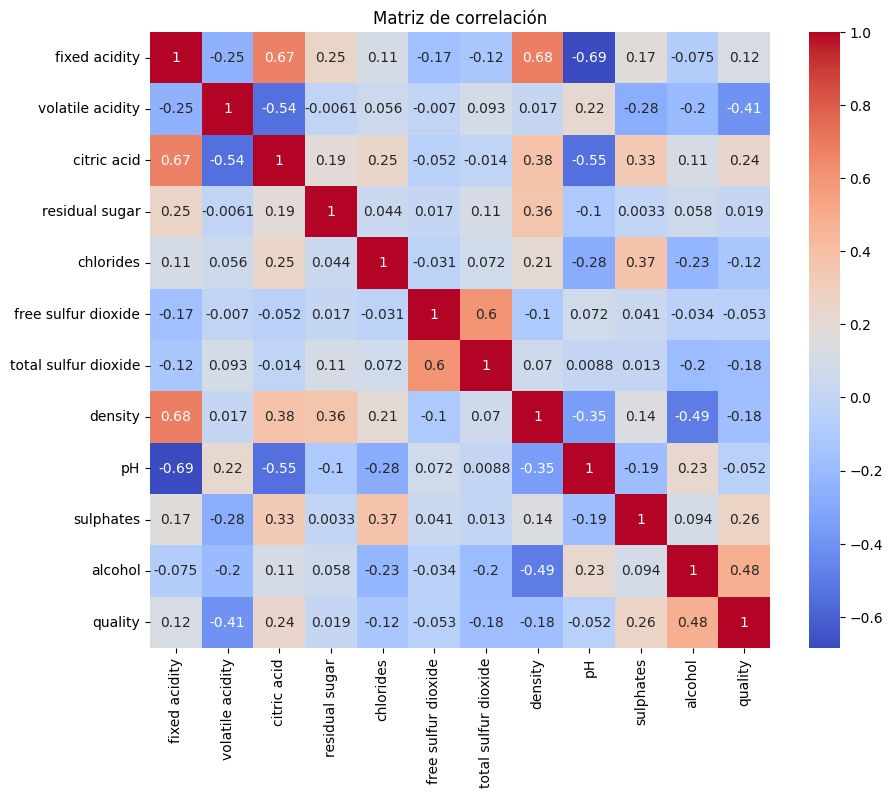

In [116]:
# Mapa de calor de correlación entre variables numéricas.
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

**Correlaciones positivas:**
alcohol: 0.48 → Es la más alta. A mayor contenido de alcohol, mayor calidad del vino según este dataset.

sulphates: 0.26 → También tiene una correlación positiva moderada.

citric acid: 0.24 → Leve relación positiva con la calidad.

**Correlaciones negativas:**
volatile acidity: -0.41 → Correlación negativa moderada. A mayor acidez volátil, menor calidad.

density: -0.18 → Ligeramente negativa. Vinos más densos tienden a ser de menor calidad.

chlorides: -0.12 → Efecto leve, pero también negativo.

**Variables con poca o nula relación:**
fixed acidity, residual sugar, free sulfur dioxide, total sulfur dioxide, pH → Todas estas tienen correlaciones muy cercanas a 0, por lo tanto, no parecen tener una relación clara con la calidad del vino en este caso.

# **Split : features y target**
* Se estima conveniente incluir a todas las features en el X, para una primera versión de ML, en el caso de obtener métricas de predicción bajas o erróneas, se estimará la eliminación de algunas de ellas.

In [40]:
X=df.drop(columns='quality')
y=df['quality']

In [117]:
y.value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


In [41]:
# Dividir en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Definir Variables
num_cols = X.columns.tolist()

**Regresión Logística**

In [43]:
# Preprocesamiento.
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols)

])

In [44]:
# Pipeline con logistic regression.
pipeline_logreg = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

In [45]:
# Entrenar.
pipeline_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [46]:
# Prediccion.
y_pred_logreg = pipeline_logreg.predict(X_test)

In [47]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

**Algoritmo de Regresión con Árbol de decisión**

In [48]:
# Preprocesador.
preprocessor_tree = ColumnTransformer(transformers=[
    ("num", "passthrough", num_cols)
])

# Modelo.
pipeline_tree = Pipeline([
    ("preprocessing", preprocessor_tree),
    ("model", DecisionTreeClassifier(max_depth=8, random_state=42))
])

In [49]:
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=8, random_state=42))])

In [102]:
# Prediccion.
y_pred_tree = pipeline_tree.predict(X_test)

In [103]:
# evaluar.

accuracy = accuracy_score(y_test, y_pred_tree)

**Algoritmo de Regresión con KNN**

In [104]:
# Preprocesador.
preprocessor_knn = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols) # se debe escalar
])

# Modelo.
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor_knn),
    ("model", KNeighborsClassifier(n_neighbors=3))
])

In [105]:
# Entrenamiento.
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('model', KNeighborsClassifier(n_neighbors=3))])

In [106]:
# Prediccion.
y_pred_knn = pipeline_knn.predict(X_test)

**Algoritmo de Regresión con Random Forest**

In [55]:
# Preprocesador.
preprocessor_forest = ColumnTransformer(transformers=[
    ("num", "passthrough", num_cols)
])

# Modelo.
pipeline_forest = Pipeline([
    ("preprocessing", preprocessor_forest),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [107]:
# Entrenamiento.
pipeline_forest.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [108]:
# Prediccion.
y_pred_forest = pipeline_forest.predict(X_test)

**Evaluación de los algoritmos o modelos entrenados para predecir el indice de Calidad del vinos de acuerdo a la métricas accuracy**

In [109]:

print("Accuracy Regresión Logística:", accuracy_score(y_test, y_pred_logreg))
print("Accuracy Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))
print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))
print("Accuracy Random Forest :", accuracy_score(y_test, y_pred_forest))

Accuracy Regresión Logística: 0.6462882096069869
Accuracy Árbol de Decisión: 0.5240174672489083
Accuracy KNN: 0.5109170305676856
Accuracy Random Forest : 0.6681222707423581


**Análisis de Algoritmos de Clasificación**

# <font color="purple">**Exportación Mejor Modelo**</font>


Se seleccionó y exportó el modelo Random Forest debido a que obtuvo el mayor nivel de precisión (accuracy = 66.8%) entre los modelos evaluados. Por tanto, se considera que Random Forest es el modelo más confiable y con mejor capacidad de generalización para este problema, y por ello se exportó como modelo final.

In [110]:
import joblib

path ='/content/drive/MyDrive/Bootcamp-ML/Cores/CORE 4 Wines/mmodelo_core4_RF.pkl'
joblib.dump(pipeline_forest, path)

['/content/drive/MyDrive/Bootcamp-ML/Cores/CORE 4 Wines/mmodelo_core4_RF.pkl']

# **Conclusión final**

El modelo Random Forest resultó ser el más preciso y confiable para este conjunto de datos, alcanzando un accuracy de 66.8%.

El modelo KNN podría mejorar significativamente si se ajustan sus hiperparámetros (como el valor de k) y se normalizan adecuadamente los datos de entrada. Actualmente su rendimiento es bajo (51.1%), pero tiene potencial con un mejor preprocesamiento.

La Regresión Logística, aunque superó al árbol de decisión y a KNN, no logró un rendimiento sobresaliente. Sin embargo, puede considerarse como una opción base por su simplicidad e interpretabilidad.

El Árbol de Decisión tuvo el peor desempeño (52.4%), posiblemente por sobreajuste o por falta de poda.

# **<font color="tomato">Optimizadores con Gridsearch</font>**

In [111]:
from sklearn.model_selection import GridSearchCV

# **Optimizador KNN**

In [112]:
# Preprocesador.
preprocessor_knn = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols)
])

# Model.
knn_pipeline = Pipeline([
    ("pp", preprocessor_knn),
    ("model", KNeighborsClassifier()) #no se define el nro de vecinos
])

In [113]:
# Optimizacion de hiperparametros.
knn_params = {
    "model__n_neighbors": [2, 3, 5, 10]

    }

knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring="r2")
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'residual '
                                                                          'sugar',
                                                                          'chlorides',
                                                                          'free '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'total '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'density',
                                                                          'pH',
                                                                          'sulphates',
                                                                          'alcohol'])])),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [2, 3, 5, 10]}, scoring='r2')

In [69]:
# Evaluación.
knn_bestg = knn_grid.best_estimator_ #prediccion con la mejor estimador

In [70]:
knn_bestg

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('model', KNeighborsClassifier(n_neighbors=10))])

In [85]:
y_pred_knng = knn_bestg.predict(X_test)

print("KNN Classifier")
print("Mejores parámetros:", knn_grid.best_params_) #mejor parametro --- > no es necesario probarlo, se puede hacer otro grisearch con 10, 15 , 20.. o menores..es hasta que mp cambie
print("Accuracy:", accuracy_score(y_test, y_pred_knng))

KNN Classifier
Mejores parámetros: {'model__n_neighbors': 10}
Accuracy: 0.5982532751091703


# **Optimizador Random Forest**

In [77]:
# Preprocesador.
preprocessor_forest = ColumnTransformer(transformers=[
    ("num", "passthrough", num_cols)
])

# Modelo.
pipeline_forest = Pipeline([
    ("pp", preprocessor_forest),
    ("model", RandomForestClassifier(random_state=42))
])

In [78]:
# Optimizacion de hiperparametros.
forest_params = {
    "model__n_estimators": [50, 100, 200] # El nombre debe coincidir con el nombre del modelo.
}

forest_grid = GridSearchCV(pipeline_forest, forest_params, cv=3, scoring="r2")
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'residual '
                                                                          'sugar',
                                                                          'chlorides',
                                                                          'free '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'total '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'density',
                                                                          'pH',
                                                                          'sulphates',
                                                                          'alcohol'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'model__n_estimators': [50, 100, 200]}, scoring='r2')

In [79]:
# Evaluación.
forest_best = forest_grid.best_estimator_
y_pred_forest = forest_best.predict(X_test)


In [86]:

print("Random Forest Classifier")
print("Mejores parámetros:", forest_grid.best_params_)
print("Accuraccy:", accuracy_score(y_test, y_pred_forest))

Random Forest Classifier
Mejores parámetros: {'model__n_estimators': 100}
Accuraccy: 0.6681222707423581


**Justificación de selección del modelo final: Random Forest Classifier**
Tras aplicar GridSearchCV con validación cruzada para optimizar los hiperparámetros, se obtuvieron los siguientes resultados:

KNN Classifier con n_neighbors = 10 alcanzó un accuracy de 59.8%

Random Forest Classifier con n_estimators = 100 logró un accuracy de 66.8%

De estos, el modelo Random Forest mostró el mejor desempeño en términos de precisión..

Por ello, se procedió a exportar el modelo Random Forest optimizado como el más confiable y eficaz para el problema abordado.

In [87]:
path ='/content/drive/MyDrive/Bootcamp-ML/Cores/CORE 4 Wines/mmodelo_GridSearch_core4_RF.pkl'
joblib.dump(pipeline_forest, path)

['/content/drive/MyDrive/Bootcamp-ML/Cores/CORE 4 Wines/mmodelo_GridSearch_core4_RF.pkl']

# **Evaluación de los modelos**

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

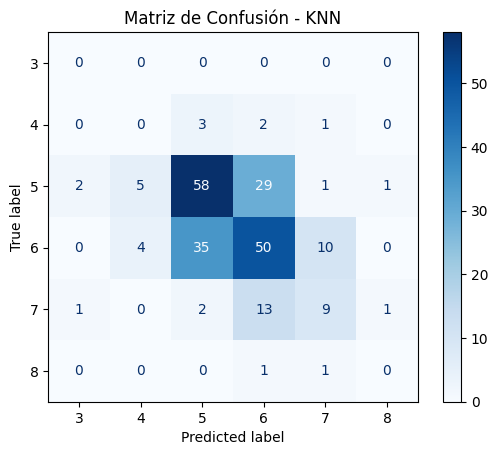

In [138]:
# Predicciones
disp_rf = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap="Blues", normalize=None)

plt.title("Matriz de Confusión - KNN")
plt.show()


**Clase 5:**
KNN: 58 predicciones correctas, 29 clasificadas como 6.



**Clase 6:**
KNN: 50 correctas, pero 35 clasificadas como 5 y 10 como 7.


**Clase 7:**
KNN: Solo 9 predicciones correctas, 13 clasificadas como 6.



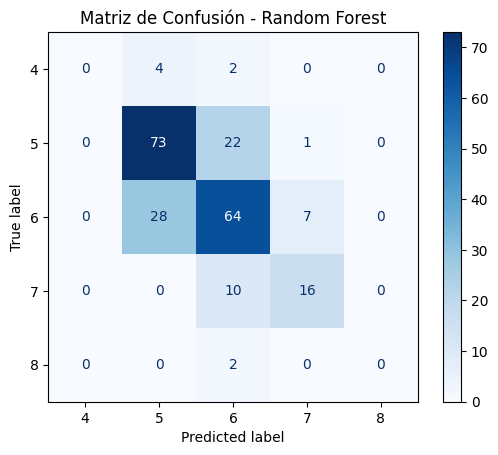

In [136]:
# Matriz de confusión - Random Forest
disp_rf = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_forest, cmap="Blues", normalize=None)
plt.title("Matriz de Confusión - Random Forest")
plt.show()

**Clase 5:**

Random Forest: 73 correctas, 22 clasificadas como 6 → Mejora clara.

**Clase 6:**


Random Forest: 64 correctas, 28 clasificadas como 5 y 7 como 7 → Mejora, aunque todavía hay confusión con clase 5.

**Clase 7:**


Random Forest: 16 correctas, 10 clasificadas como 6 → Mejora también.

Random Forest supera claramente a KNN en precisión general, especialmente en las clases 5 y 6.
KNN muestra más confusión entre clases (clase 5 ↔ 6, 6 ↔ 7)